# <center> <font color='red'> The Economist's Big Mac Index: </font> <font color='orange'> Tracking Prices Over Time </font> </center>
<center> By: Howard Yan </center>

## Background: What is The Economist's Big Mac Index?

The Big Mac Index was invented by The Economist in 1996 to determine whether currencies were over or under valued. This is done by comparing the prices of burgers in different countries to the exchange rates between their currencies. 

* For instance, a Big Mac costs 4.27 Euros in the Eurozone and 5.65 USD in the United States
* This implies an exchange rate of 1 USD : 0.76 EURO
* However, the actual exchange rate is 1 USD : 0.85 EURO
* This implies the Euro is 11% undervalued relative to the US Dollar

Source: [The Economist](https://www.economist.com/big-mac-index)

## Table of Contents
* [Basic EDA](#first-bullet)
* [Is the Chinese Yuan Undervalued?](#second-bullet)
* [Is the Indian Rupee Undervalued?](#third-bullet)

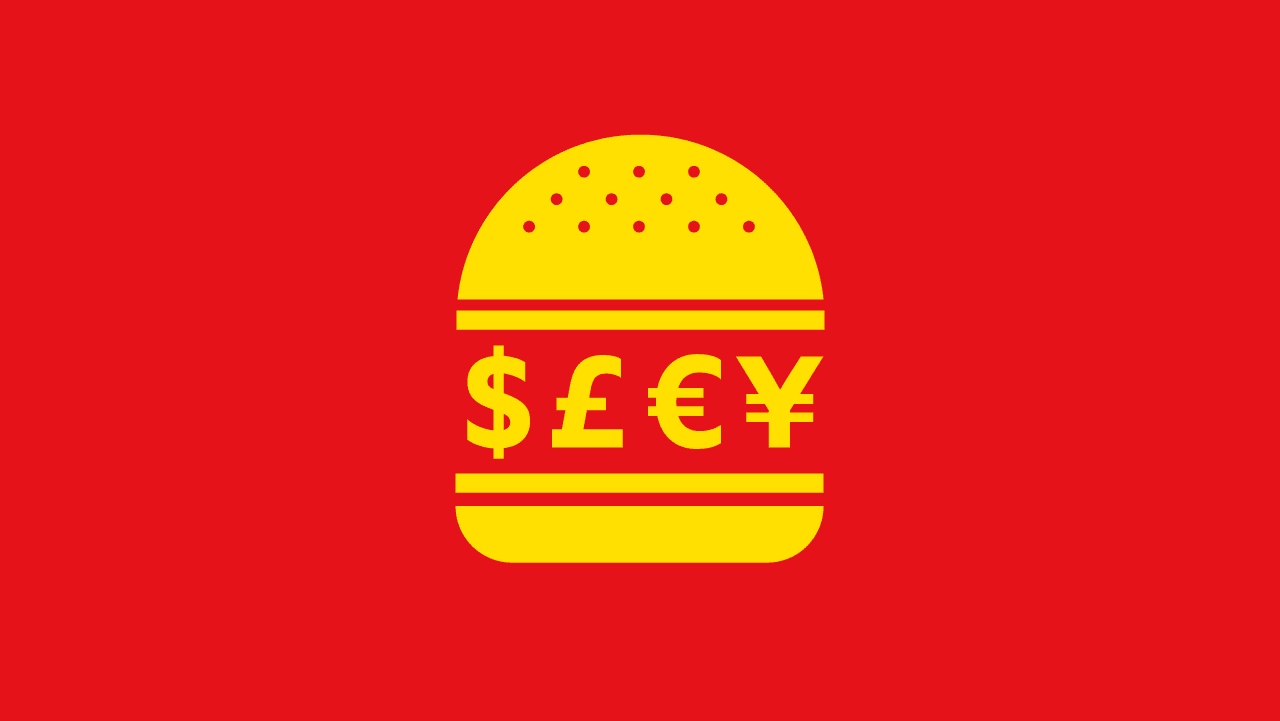

## First some basic EDA: analyze the change in Big Mac prices over the years
<a class="anchor" id="first-bullet"></a>
- It has increased steadily since 2000
- There is more variation in pricing in 2020 compared to 2000

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("/Users/howardyan/Desktop/Data Science Website Plan/Big Mac Index Project/big-mac-raw-index.csv")

In [4]:
data.head(5)

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,USD,EUR,GBP,JPY,CNY
0,2000-04-01,ARG,ARS,Argentina,2.50,1.000000,2.500000,-0.00398,0.05007,-0.16722,-0.09864,1.09091
1,2000-04-01,AUS,AUD,Australia,2.59,1.680000,1.541667,-0.38579,-0.35246,-0.48645,-0.44416,0.28939
2,2000-04-01,BRA,BRL,Brazil,2.95,1.790000,1.648045,-0.34341,-0.30778,-0.45102,-0.40581,0.37836
3,2000-04-01,GBR,GBP,Britain,1.90,0.632911,3.002000,0.19602,0.26092,0.00000,0.08235,1.51076
4,2000-04-01,CAN,CAD,Canada,2.85,1.470000,1.938776,-0.22758,-0.18566,-0.35417,-0.30099,0.62152


In [5]:
overall=data[['name','dollar_price','date']]

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


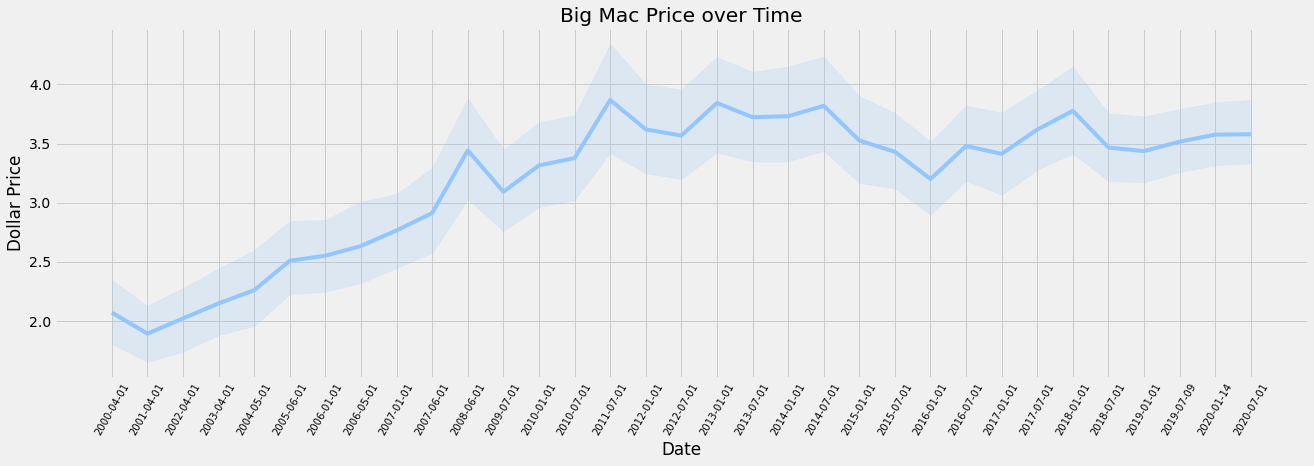

In [6]:
plt.style.use('fivethirtyeight')
plt.style.use('seaborn-pastel')
plt.figure(figsize=(20,6))
sns.lineplot(overall['date'],overall['dollar_price'])
plt.xticks(rotation=60,size=10);
plt.xlabel('Date')
plt.ylabel('Dollar Price');
plt.title('Big Mac Price over Time');

### Here, I plot the price distribution for each country over time
- It appears prices in Middle Eastern countries on the right end of the graph (Jordan, Kuwait, Lebanon, Oman, Qatar, and the UAE) have not changed significantly over time


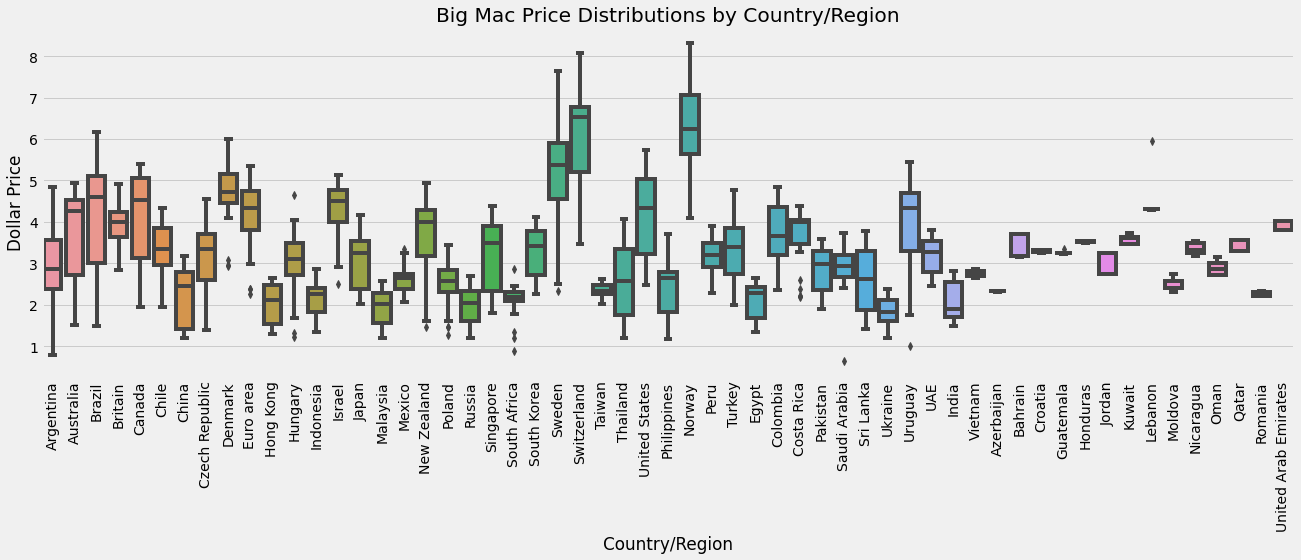

In [44]:
plt.style.use('fivethirtyeight')
plt.style.use('seaborn-pastel')
plt.figure(figsize=(20,6))
sns.boxplot(x='name', y='dollar_price', data=overall);
plt.xticks(rotation=90,size=14);
plt.xlabel('Country/Region')
plt.ylabel('Dollar Price');
plt.title('Big Mac Price Distributions by Country/Region');

In [8]:
ME=overall[overall['name'].str.contains('Jordan|Kuwait|Lebanon|Oman|Qatar|UAE')]
ME.head(5)

,name,dollar_price,date
194,UAE,2.450647,2005-06-01
265,UAE,2.450580,2006-05-01
305,UAE,2.722867,2007-01-01
345,UAE,2.722681,2007-06-01
385,UAE,2.722681,2008-06-01


## However, upon further inspection it appears the lower variation in Middle Eastern Big Mac prices is due to missing data rather than intentional policy by McDonalds chains

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


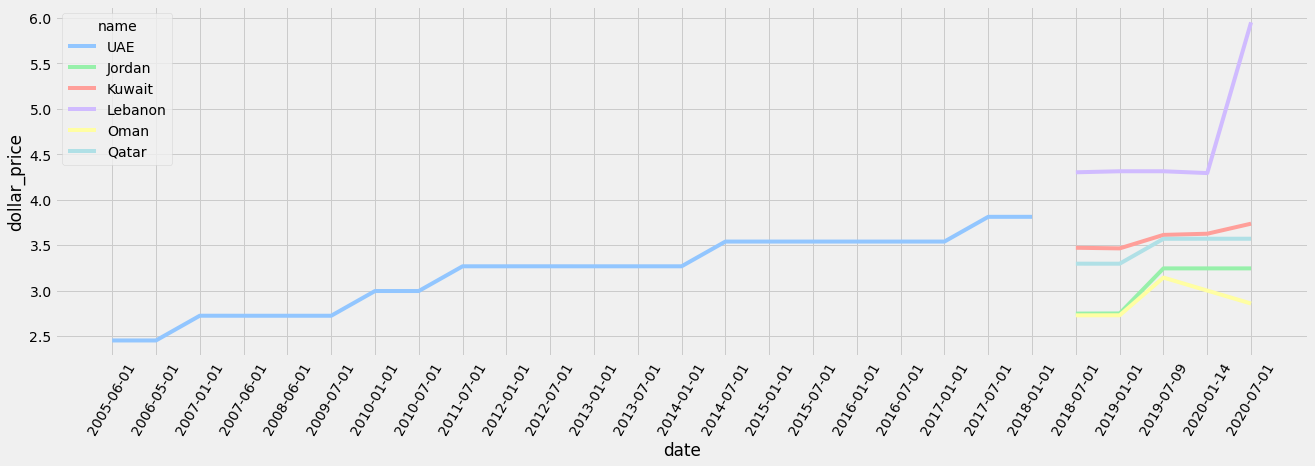

In [9]:
plt.figure(figsize=(20,6))
sns.lineplot(ME['date'],ME['dollar_price'],hue=ME['name']);
plt.xticks(rotation=60);

## Goal 1: Determine if the Chinese RMB is undervalued relative to the USD
<a class="anchor" id="second-bullet"></a>

### <font color='Orange'>First, I'll focus on trade between the US and China given looser monetary policy in recent years in response to the COVID-19 pandemic </color>

- The Federal Reserve kepts interest rates low throughout the pandemic to stimulate consumer spending in the US
- Low interest rates typically result in less return for investors, which reduces demand for a currency, causing it to depreciate 
- I aim to understand whether this was captured in the McDonalds Big Mac price index


In [10]:
## First, I filter out data for China and the US

In [11]:
US=data[(data['name']=='United States')]
China=data[(data['name']=='China')]

In [12]:
China.head(5)

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,USD,EUR,GBP,JPY,CNY
6,2000-04-01,CHN,CNY,China,9.9,8.28,1.195652,-0.52364,-0.49779,-0.60171,-0.56891,0.0
34,2001-04-01,CHN,CNY,China,9.9,8.28,1.195652,-0.52927,-0.47132,-0.57984,-0.49571,0.0
62,2002-04-01,CHN,CNY,China,10.5,8.28,1.268116,-0.49072,-0.46635,-0.56052,-0.37078,0.0
94,2003-04-01,CHN,CNY,China,9.9,8.28,1.195652,-0.55880,-0.59891,-0.61973,-0.45237,0.0
125,2004-05-01,CHN,CNY,China,10.4,8.28,1.256039,-0.56688,-0.61799,-0.62676,-0.45827,0.0


In [13]:
US.head(5)

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,USD,EUR,GBP,JPY,CNY
27,2000-04-01,USA,USD,United States,2.51,1.0,2.51,0.0,0.05427,-0.16389,-0.09503,1.09927
55,2001-04-01,USA,USD,United States,2.54,1.0,2.54,0.0,0.12310,-0.10743,0.07129,1.12436
87,2002-04-01,USA,USD,United States,2.49,1.0,2.49,0.0,0.04785,-0.13706,0.23550,0.96354
118,2003-04-01,USA,USD,United States,2.71,1.0,2.71,0.0,-0.09091,-0.13810,0.24122,1.26655
156,2004-05-01,USA,USD,United States,2.90,1.0,2.90,0.0,-0.11800,-0.13824,0.25076,1.30885


In [14]:
## The Economist collects data at regular intervals for both countries so the columns match
## Now Ill compute the ratio of the price of a Big Mac over time for China and the US

In [15]:
US_prices=US[['date','local_price']].reset_index()[['date','local_price']]
US_prices.head(5)

,date,local_price
0,2000-04-01,2.51
1,2001-04-01,2.54
2,2002-04-01,2.49
3,2003-04-01,2.71
4,2004-05-01,2.90


In [16]:
China_prices=China[['date','dollar_price','local_price']].reset_index()[['date','dollar_price','local_price']]
China_prices.head(5)

,date,dollar_price,local_price
0,2000-04-01,1.195652,9.9
1,2001-04-01,1.195652,9.9
2,2002-04-01,1.268116,10.5
3,2003-04-01,1.195652,9.9
4,2004-05-01,1.256039,10.4


In [17]:
US_prices['US_China_Ratio']=China_prices['local_price']/US_prices['local_price']
US_prices=US_prices[['date','US_China_Ratio']]
US_prices.head(5)

,date,US_China_Ratio
0,2000-04-01,3.944223
1,2001-04-01,3.897638
2,2002-04-01,4.216867
3,2003-04-01,3.653137
4,2004-05-01,3.586207


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


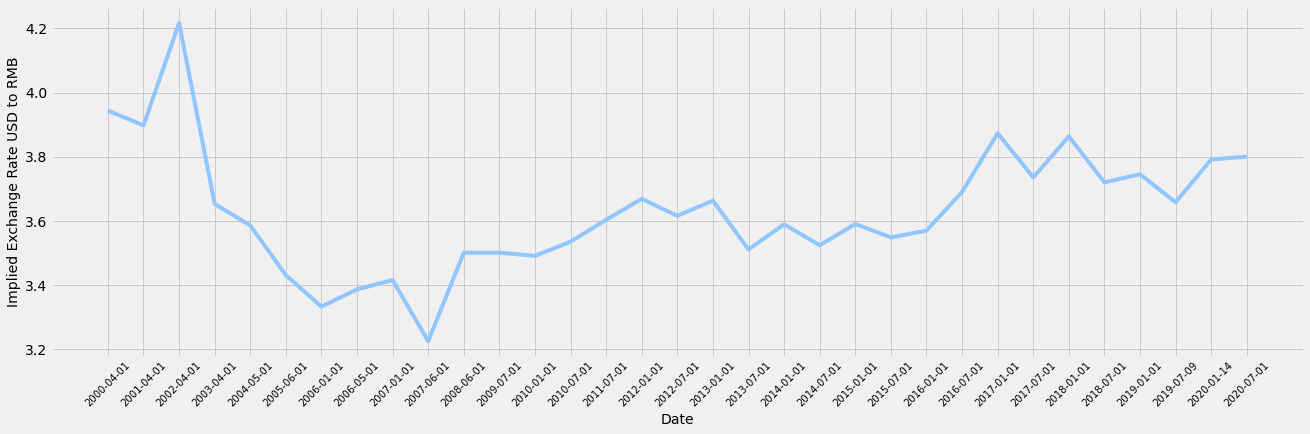

In [18]:
plt.style.use('fivethirtyeight')
plt.style.use('seaborn-pastel')
plt.figure(figsize=(20,6))
sns.lineplot(US_prices['date'],US_prices['US_China_Ratio']);
plt.xticks(rotation=45,size=10);
plt.xlabel('Date',size=14)
plt.ylabel('Implied Exchange Rate USD to RMB',size=14);

In [19]:
## I can find the exchange rate at these times by dividing China's local prices by the USD prices

In [20]:
China=China.reset_index()

In [21]:
US_prices['Exchange_Rate']=China['local_price']/China['dollar_price']

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


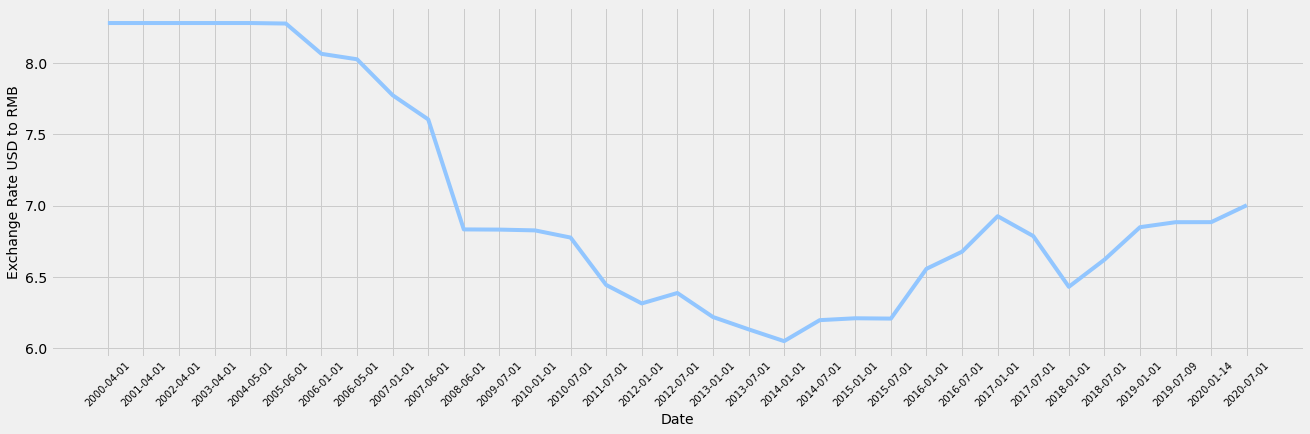

In [22]:
plt.style.use('fivethirtyeight')
plt.style.use('seaborn-pastel')
plt.figure(figsize=(20,6))
sns.lineplot(US_prices['date'],US_prices['Exchange_Rate']);
plt.xticks(rotation=45,size=10);
plt.xlabel('Date',size=14)
plt.ylabel('Exchange Rate USD to RMB',size=14);

In [23]:
## I put this together to find the final time series graph

In [24]:
US_prices['Valuation']=US_prices['US_China_Ratio']/US_prices['Exchange_Rate']-1

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


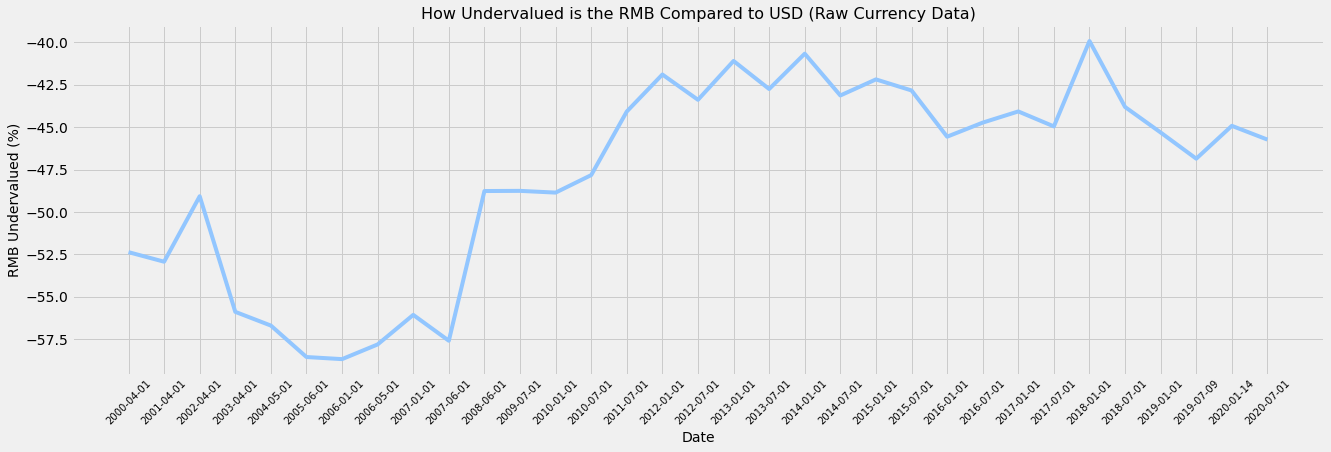

In [25]:
plt.style.use('fivethirtyeight')
plt.style.use('seaborn-pastel')
plt.figure(figsize=(20,6))
sns.lineplot(US_prices['date'],US_prices['Valuation']*100)
plt.xticks(rotation=45,size=10);
plt.xlabel('Date',size=14)
plt.ylabel('RMB Undervalued (%)',size=14)
plt.title('How Undervalued is the RMB Compared to USD (Raw Currency Data)',size=16);

- #### This analysis suggests the RMB is 45% undervalued compared to the USD as of July 2020. The People's Bank of China announced further monetary easing to address the economic recession resulting from COVID-19. 
- #### RMB was more undervalued between 2000 and 2007, before rapidly gaining in value after 2007 until 2008, when the global financil crisis reduced demand for Chinese goods. As a result, the government stopped the RMB's appreciation to maintain the competitiveness of Chinese exports. 

## Goal 2: Determine if the Indian Rupee is undervalued
<a class="anchor" id="third-bullet"></a>

In [26]:
data.head(5)

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,USD,EUR,GBP,JPY,CNY
0,2000-04-01,ARG,ARS,Argentina,2.50,1.000000,2.500000,-0.00398,0.05007,-0.16722,-0.09864,1.09091
1,2000-04-01,AUS,AUD,Australia,2.59,1.680000,1.541667,-0.38579,-0.35246,-0.48645,-0.44416,0.28939
2,2000-04-01,BRA,BRL,Brazil,2.95,1.790000,1.648045,-0.34341,-0.30778,-0.45102,-0.40581,0.37836
3,2000-04-01,GBR,GBP,Britain,1.90,0.632911,3.002000,0.19602,0.26092,0.00000,0.08235,1.51076
4,2000-04-01,CAN,CAD,Canada,2.85,1.470000,1.938776,-0.22758,-0.18566,-0.35417,-0.30099,0.62152


In [27]:
## First, I filter out data for India and the US

In [28]:
US=data[(data['name']=='United States')]
India=data[(data['name']=='India')]

In [29]:
India.head(5)

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,USD,EUR,GBP,JPY,CNY
527,2011-07-01,IND,INR,India,84.0,44.400,1.891892,-0.53459,-0.61612,-0.51386,-0.53669,-0.16770
569,2012-01-01,IND,INR,India,84.0,51.905,1.618341,-0.61443,-0.63474,-0.57673,-0.61099,-0.33632
610,2012-07-01,IND,INR,India,89.0,56.165,1.584617,-0.63383,-0.63525,-0.61930,-0.61266,-0.35314
651,2013-01-01,IND,INR,India,89.0,53.395,1.666823,-0.61835,-0.65830,-0.60764,-0.52566,-0.35198
693,2013-07-01,IND,INR,India,90.0,59.980,1.500500,-0.67070,-0.67796,-0.62675,-0.53060,-0.42474


In [30]:
US.head(5)

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,USD,EUR,GBP,JPY,CNY
27,2000-04-01,USA,USD,United States,2.51,1.0,2.51,0.0,0.05427,-0.16389,-0.09503,1.09927
55,2001-04-01,USA,USD,United States,2.54,1.0,2.54,0.0,0.12310,-0.10743,0.07129,1.12436
87,2002-04-01,USA,USD,United States,2.49,1.0,2.49,0.0,0.04785,-0.13706,0.23550,0.96354
118,2003-04-01,USA,USD,United States,2.71,1.0,2.71,0.0,-0.09091,-0.13810,0.24122,1.26655
156,2004-05-01,USA,USD,United States,2.90,1.0,2.90,0.0,-0.11800,-0.13824,0.25076,1.30885


In [31]:
## The Economist collects data at regular intervals for both countries so the columns match
## Now Ill compute the ratio of the price of a Big Mac over time for India and the US

In [32]:
US_prices=US[['date','local_price']].reset_index()[['date','local_price']]
US_prices.head(5)

,date,local_price
0,2000-04-01,2.51
1,2001-04-01,2.54
2,2002-04-01,2.49
3,2003-04-01,2.71
4,2004-05-01,2.90


In [33]:
India_prices=India[['date','dollar_price','local_price']].reset_index()[['date','dollar_price','local_price']]
India_prices.head(5)

,date,dollar_price,local_price
0,2011-07-01,1.891892,84.0
1,2012-01-01,1.618341,84.0
2,2012-07-01,1.584617,89.0
3,2013-01-01,1.666823,89.0
4,2013-07-01,1.500500,90.0


In [34]:
US_prices['US_India_Ratio']=India_prices['local_price']/US_prices['local_price']
US_prices=US_prices[['date','US_India_Ratio']]
US_prices.head(5)

,date,US_India_Ratio
0,2000-04-01,33.466135
1,2001-04-01,33.070866
2,2002-04-01,35.742972
3,2003-04-01,32.841328
4,2004-05-01,31.034483


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


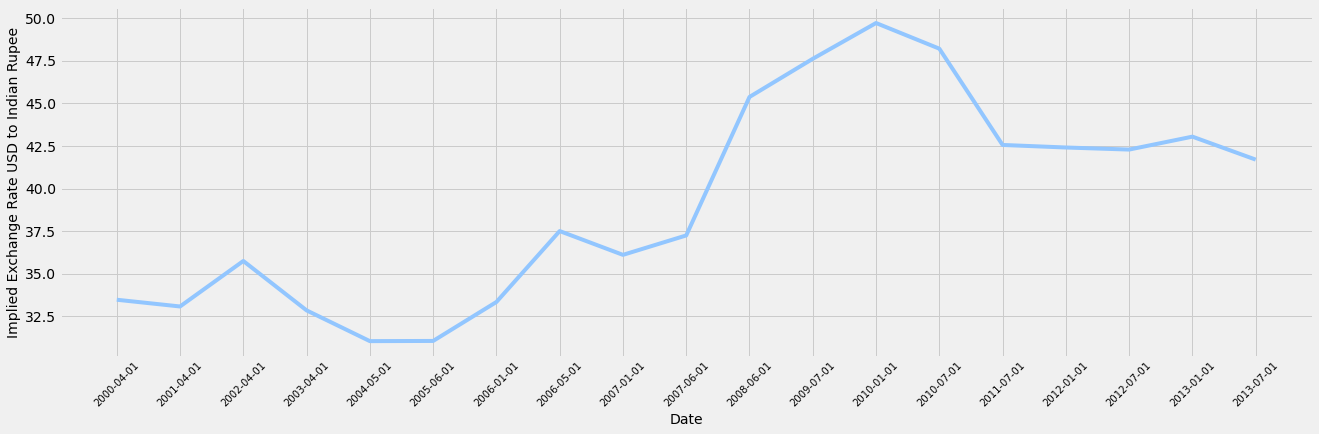

In [35]:
plt.style.use('fivethirtyeight')
plt.style.use('seaborn-pastel')
plt.figure(figsize=(20,6))
sns.lineplot(US_prices['date'],US_prices['US_India_Ratio']);
plt.xticks(rotation=45,size=10);
plt.xlabel('Date',size=14)
plt.ylabel('Implied Exchange Rate USD to Indian Rupee',size=14);

In [36]:
## I can find the exchange rate at these times by dividing India's local prices by the USD prices

In [37]:
India=India.reset_index()

In [38]:
US_prices['Exchange_Rate']=India['local_price']/India['dollar_price']

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


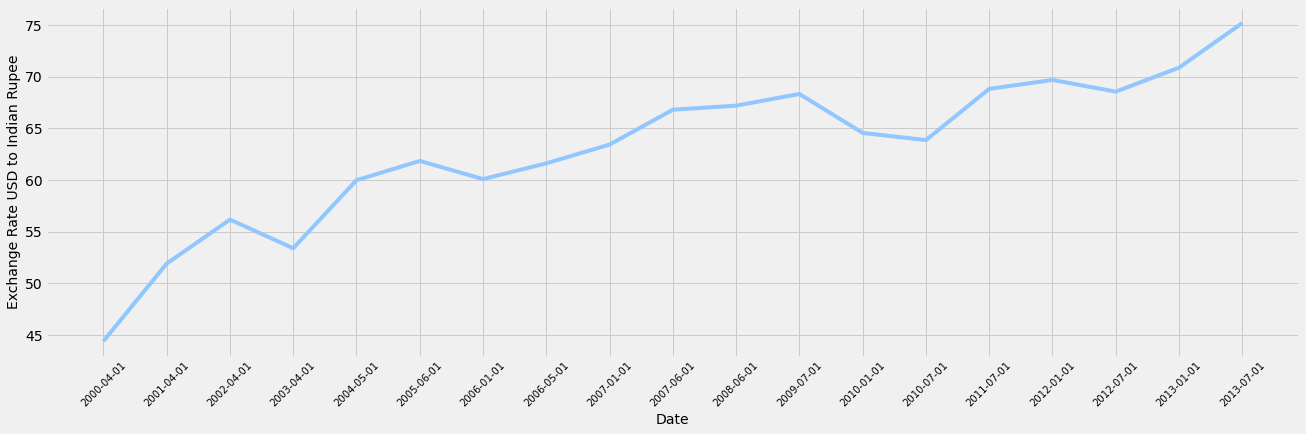

In [39]:
plt.style.use('fivethirtyeight')
plt.style.use('seaborn-pastel')
plt.figure(figsize=(20,6))
sns.lineplot(US_prices['date'],US_prices['Exchange_Rate']);
plt.xticks(rotation=45,size=10);
plt.xlabel('Date',size=14)
plt.ylabel('Exchange Rate USD to Indian Rupee',size=14);

In [40]:
## I put this together to find the final time series graph

In [41]:
US_prices['Valuation']=US_prices['US_India_Ratio']/US_prices['Exchange_Rate']-1

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


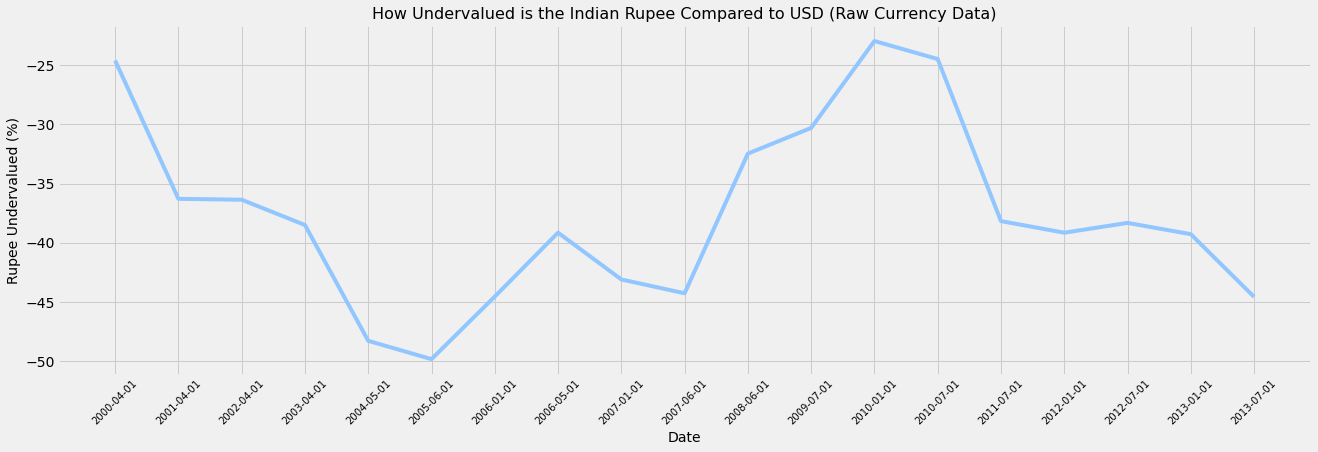

In [42]:
plt.style.use('fivethirtyeight')
plt.style.use('seaborn-pastel')
plt.figure(figsize=(20,6))
sns.lineplot(US_prices['date'],US_prices['Valuation']*100)
plt.xticks(rotation=45,size=10);
plt.xlabel('Date',size=14)
plt.ylabel('Rupee Undervalued (%)',size=14)
plt.title('How Undervalued is the Indian Rupee Compared to USD (Raw Currency Data)',size=16);

- #### This analysis suggests the Indian Rupee may be undervalued against the USD according to the Big Mac Index. 
- #### Unlike China, this undervaluation appears to oscillate more
- #### The Reserve Bank of India observes a more market-based approach to managing the Rupee